<a href="https://colab.research.google.com/github/mansi812/ML-assignment/blob/main/MLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Coupon Reco.xlsx to Coupon Reco.xlsx
User uploaded file "Coupon Reco.xlsx" with length 1207913 bytes


In [5]:
fname = "Coupon Reco.xlsx"
df = pd.read_excel(fname)


In [6]:
#Check the first 5 records
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [10]:
df.shape

(12684, 25)

In [7]:
#Distribution of target variable in dataset
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [8]:
df.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Not accepted|| 1: accepted)')

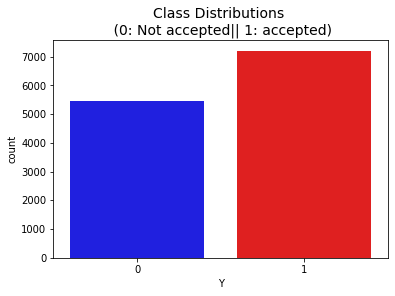

In [9]:
colors = ["blue", "red"]

sns.countplot('Y', data=df, palette=colors)
plt.title('Class Distributions \n (0: Not accepted|| 1: accepted)', fontsize=14)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

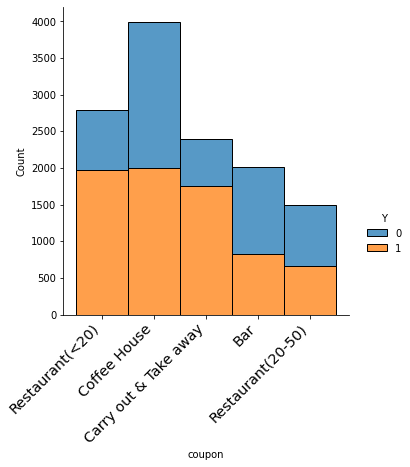

In [17]:
#checking which coupons are most accepted
plt.figure(figsize=(8,4))
sns.displot(df, x='coupon', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In [ ]:
#Check the scatter plot for Time and Amount to see if there there is any relationship of fraud transactions with time and amount

plt.style.use("ggplot")
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

In [ ]:
#One Hot Encoding for Gender and Home
train_data = pd.get_dummies(train_data,columns = ['Implied Gender','Home/Apt/ PO Box'])
test_data = pd.get_dummies(test_data,columns = ['Implied Gender','Home/Apt/ PO Box'])

In [ ]:
train_data.columns

Index(['Pregnancy Test', 'Birth Control', 'Feminine Hygiene', 'Folic Acid',
       'Prenatal Vitamins', 'Prenatal Yoga', 'Body Pillow', 'Ginger Ale',
       'Sea Bands', 'Stopped buying ciggies', 'Cigarettes',
       'Smoking Cessation', 'Stopped buying wine', 'Wine', 'Maternity Clothes',
       'PREGNANT', 'Implied Gender_F', 'Implied Gender_M', 'Implied Gender_U',
       'Home/Apt/ PO Box_A', 'Home/Apt/ PO Box_H', 'Home/Apt/ PO Box_P'],
      dtype='object')

In [ ]:
#Create the train and test data
X_train = train_data.drop('PREGNANT',axis = 1)
y_train = train_data['PREGNANT']

In [ ]:
X_test = test_data.drop('PREGNANT',axis = 1)
y_test = test_data['PREGNANT']

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = lr_model.predict(X_test)
print(accuracy_score(predictions, y_test))


0.88


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print(cm)

[[833 107]
 [ 13  47]]


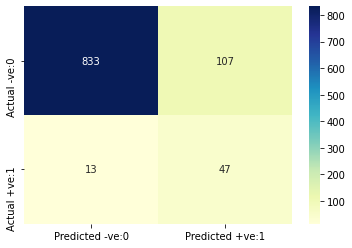

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       940
           1       0.31      0.78      0.44        60

    accuracy                           0.88      1000
   macro avg       0.64      0.83      0.69      1000
weighted avg       0.94      0.88      0.90      1000



In [ ]:
 prediction_prob = lr_model.predict_proba(X_test)[:,1]

 prediction_prob[prediction_prob > 0.8] = 1
 prediction_prob[prediction_prob <= 0.8] = 0
 

In [ ]:
print(accuracy_score(y_test,prediction_prob))

0.949


In [ ]:
print(classification_report(y_test,prediction_prob))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       940
           1       0.57      0.62      0.59        60

    accuracy                           0.95      1000
   macro avg       0.77      0.79      0.78      1000
weighted avg       0.95      0.95      0.95      1000

